In [1]:
import numpy
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]

5

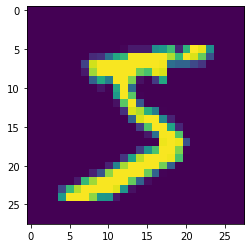

In [6]:
plt.imshow(X_train[0])

In [7]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [8]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [9]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

In [12]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 201s 107ms/step - loss: 0.1931 - accuracy: 0.9542 - val_loss: 0.0823 - val_accuracy: 0.9753
Epoch 2/5
1875/1875 [==============================] - 195s 104ms/step - loss: 0.0660 - accuracy: 0.9795 - val_loss: 0.0846 - val_accuracy: 0.9767
Epoch 3/5
1875/1875 [==============================] - 193s 103ms/step - loss: 0.0457 - accuracy: 0.9859 - val_loss: 0.0886 - val_accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 184s 98ms/step - loss: 0.0355 - accuracy: 0.9886 - val_loss: 0.1043 - val_accuracy: 0.9753
Epoch 5/5
1875/1875 [==============================] - 183s 98ms/step - loss: 0.0254 - accuracy: 0.9921 - val_loss: 0.0987 - val_accuracy: 0.9776


In [13]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.09868647158145905, 0.9775999784469604]


In [14]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 71ms/step
[[1.6240675e-10 1.2209781e-16 3.4618497e-12 7.0873375e-07 5.3995534e-16
  9.5311101e-16 6.2249219e-19 9.9999928e-01 4.5839444e-14 8.3674484e-11]
 [5.6453626e-12 1.2390869e-07 9.9999988e-01 1.9862003e-12 6.2783370e-14
  5.7106877e-16 1.3002290e-08 5.6390499e-18 5.8076681e-09 1.5483028e-17]
 [1.1668463e-08 9.9932158e-01 5.9944335e-07 9.6074875e-12 6.0916605e-05
  2.2304106e-07 1.9773491e-08 1.9740847e-09 6.1659608e-04 3.3549563e-10]
 [1.0000000e+00 8.8553483e-17 5.1713531e-09 4.6528426e-17 4.3240831e-13
  5.0988675e-12 1.4208579e-08 1.9130327e-14 4.7947232e-12 2.0618503e-12]]


In [15]:
print(numpy.argmax(prediction, axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
